# **PRUEBA TÉCNICA PROTECCIÓN**

### *PUNTO 2: Reviews Productos de Amazon*


En el siguiente enlace puedes encontrar un conjunto de datos público sobre reviews en Amazon de productos:

URL: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products

Utilizando estos datos:
1. Realiza un análisis exploratorio del conjunto de datos y presente sus
conclusiones.
2. Crea un modelo que utilice la descripción de la review (y cualquier otro
campo que decidas incluir justificando la elección de este) para clasificar la
review en una nota del 1 al 5.
3. Acabas de generar un modelo de sentimiento. ¿Cómo crees que se podría
aplicar este tipo de modelo en una compañía como Protección S.A.?

***
***

**Presentado por:** Nathalia Moreno Sánchez


## **ANÁLISIS EXPLORATORIO**

In [3]:
#librerias
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
#import shap

# sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

#from pyod.models.ecod import ECOD
from yellowbrick.cluster import KElbowVisualizer

import lightgbm as lgb
#import prince

import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import torch
import torchtext
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import re
from collections import Counter, OrderedDict
from torchtext.vocab import vocab
from torchtext import __version__ as torchtext_version
from pkg_resources import parse_version

In [7]:
# Utilizar la función read_excel para cargar el archivo
file_path = "reviews.csv"
df = pd.read_csv(file_path, error_bad_lines=False)
df.columns

<ipython-input-7-026972025d7b>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
<ipython-input-7-026972025d7b>:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, error_bad_lines=False)


Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [9]:
# Valores nulos en columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [10]:
# Revisión de registros duplicado
print('duplicados: ', df.duplicated().sum())

duplicados:  0


In [11]:
# Estadísticos descriptivos en varibles numéricas
df.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count          1.0        34131.000000    34627.000000               0.0   
mean   111372787.0            0.630248        4.584573               NaN   
std            NaN           13.215775        0.735653               NaN   
min    111372787.0            0.000000        1.000000               NaN   
25%    111372787.0            0.000000        4.000000               NaN   
50%    111372787.0            0.000000        5.000000               NaN   
75%    111372787.0            0.000000        5.000000               NaN   
max    111372787.0          814.000000        5.000000               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

In [12]:
df.head(5)

id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date     reviews.dateAdded  \
0  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
1  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
2  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
3  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
4  2017-01-12T00:00:00.000Z  2017-07-03T23:33:15Z   

                                    reviews.dateSeen  ... reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   

  reviews.id  reviews.numHelpful  reviews.rating  \
0        NaN                 0.0             5.0   
1        NaN                 0.0             5.0   
2        NaN                 0.0             5.0   
3        NaN                 0.0             4.0   
4        NaN                 0.0             5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   
2  http://reviews.bestbuy.com/3545/5620406/review...   
3  http://reviews.bestbuy.com/3545/5620406/review...   
4  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                             reviews.title reviews.userCity  \
0                                   Kindle              NaN   
1                                very fast              NaN   
2  Beginner tablet for our 9 year old son.              NaN   
3                                  Good!!!              NaN   
4                Fantastic Tablet for kids              NaN   

   reviews.userProvince  reviews.username  
0                   NaN           Adapter  
1                   NaN            truman  
2                   NaN             DaveZ  
3                   NaN            Shacks  
4                   NaN         explore42  

[5 rows x 21 columns]

In [13]:
review=pd.DataFrame(df.groupby('reviews.rating').size().sort_values(ascending=False).rename('Usuarios').reset_index())
review.head()

reviews.rating  Usuarios
0             5.0     23775
1             4.0      8541
2             3.0      1499
3             1.0       410
4             2.0       402

In [14]:
df.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

### **Análisis inicial:**

Se observa que la base de datos de reviews:
* Cuenta con 34660 datos y 21 variables
* 5 Variables numéricas tipo float (reviews.id, reviews.numHelpful,	reviews.rating,	reviews.userCitym,	reviews.userProvince) de las cuales: reviews.id, reviews.userCitym y reviews.userProvince contienen en su totalidad datos nulos, por lo tanto estas tres variables numéricas se pueden eliminar del análisis.
* 16 Variables de texto, algunas de ellas categóricas, otra boleana, de las cuales reviews.didPurchase en su totalidad es nula la información que pueda aportar.

Revisaremos graficamente que variables son significativas para tener un modelo de análisis de sentimientos bien elaborado.


### **ANÁLISIS GRÁFICO**
***

In [15]:
# Hay muchas variables de texto por lo tanto se crea una función de histograma para ser aplicarla en algunas variables de texto
def plot_histogram(data, bins=10, title="", xlabel="", ylabel="Frequency"):
    """
    Histograma de los datos proporcionados.

    Parámetros:
        - data: Serie de datos para la cual se creará el histograma.
        - bins: Número de contenedores para el histograma (por defecto es 10).
        - title: Título del histograma.
        - xlabel: Etiqueta del eje x.
        - ylabel: Etiqueta del eje y.
    """
    frequencies, bins, _ = plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for freq, bin_value in zip(frequencies, bins):
        plt.text(bin_value, freq, str(int(freq)), ha='center', va='bottom')

    plt.show()

In [16]:
plot_histogram(df['reviews.rating'],bins=15,title="Calificaciones de reviews")

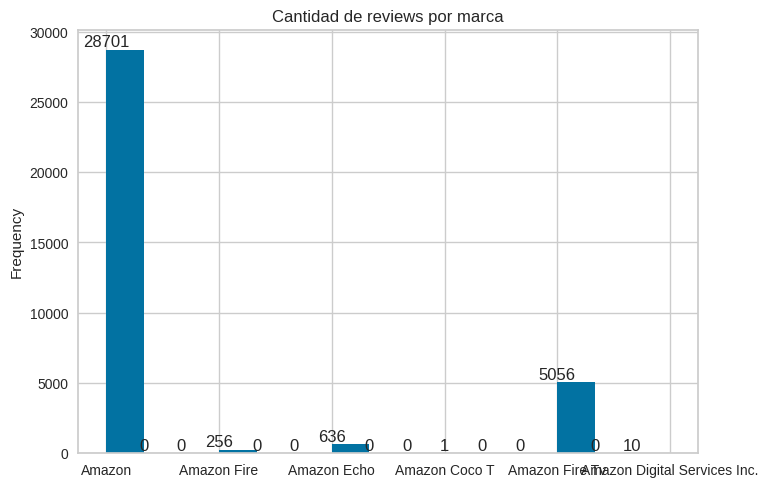

In [17]:
plot_histogram(df['brand'],bins=15,title="Cantidad de reviews por marca")


In [18]:
# Distribución de Ratings por Marca
plt.figure(figsize=(15, 10))
df.groupby('brand')['reviews.rating'].value_counts().unstack().plot(kind='bar', colormap='coolwarm')
plt.xlabel('Marca')
plt.ylabel('Conteo Rating')
plt.title('Distribución de Ratings por Marca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

In [19]:
# Proporción de personas que recomendaron o no recomendaron
plt.figure(figsize=(8, 6))
plt.pie(df['reviews.doRecommend'].value_counts(), labels=['Si Recomienda', 'No Recomienda'], autopct='%1.1f%%', startangle=90)
plt.title('Proporción de recomendación por usuario')
plt.tight_layout()
plt.show()

In [20]:
# Nube de palabras de las reseñas positivas
from wordcloud import WordCloud

# Filtramos las reseñas positivas
reviews_positivas = df[df['reviews.rating'] >= 4]
reviews_positivas.dropna(subset=['reviews.text'], inplace=True)
reviews_positivas['reviews.text'].fillna('N/A', inplace=True)

def clean_text(text):
  # Convert text to string (in case of encoding issues)
  text = str(text)
  # Replace non-alphanumeric characters with spaces
  return ''.join(char for char in text if char.isalnum() or char.isspace())

# Apply cleaning function to reviews.text
reviews_positivas['reviews.text'] = reviews_positivas['reviews.text'].apply(clean_text)

text = ' '.join(reviews_positivas['reviews.text'])

# Create the word cloud
nube_palabras = WordCloud(width=800, height=600, background_color='white').generate(text)

# Mostramos la nube de palabras
import matplotlib.pyplot as plt
plt.imshow(nube_palabras)
plt.axis('off')
plt.show()

<ipython-input-20-b79ee43f8d5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_positivas.dropna(subset=['reviews.text'], inplace=True)
<ipython-input-20-b79ee43f8d5a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_positivas['reviews.text'].fillna('N/A', inplace=True)
<ipython-input-20-b79ee43f8d5a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_posi

In [21]:
# Filtramos las reseñas negativas
reviews_negativas = df[df['reviews.rating'] <= 2]

# Aplicamos la función de limpieza
reviews_negativas['reviews.text'] = reviews_negativas['reviews.text'].apply(clean_text)

# Unimos las reseñas limpias
text_negativo = ' '.join(reviews_negativas['reviews.text'])

# Creamos la nube de palabras
nube_palabras_negativas = WordCloud(width=800, height=600, background_color='white').generate(text_negativo)

# Mostramos la nube de palabras
plt.imshow(nube_palabras_negativas)
plt.axis('off')
plt.show()

<ipython-input-21-8323417abfaf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_negativas['reviews.text'] = reviews_negativas['reviews.text'].apply(clean_text)


<ipython-input-22-5dcbec50e696>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_reviews['reviews.title'] = title_reviews['reviews.title'].apply(clean_text)


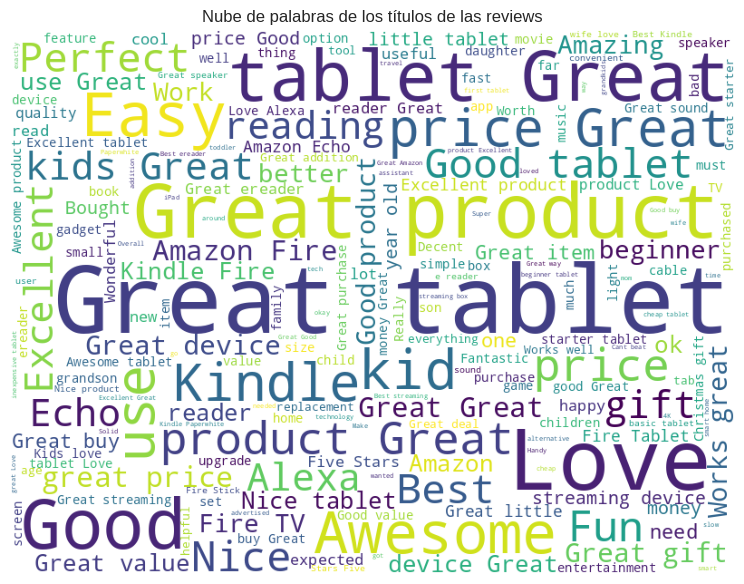

In [22]:
#Visualizar Títulos de las reviews

title_reviews = df[df['reviews.title'].notna()]

if not title_reviews.empty:
  title_reviews['reviews.title'] = title_reviews['reviews.title'].apply(clean_text)
  all_titles = ' '.join(title_reviews['reviews.title'])
  wordcloud = WordCloud(width=800, height=600, background_color='white').generate(all_titles)
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.title('Nube de palabras de los títulos de las reviews')
  plt.tight_layout()
  plt.show()
else:
  print("No se encontraron reviews.")


### **Análisis de los gráficos:**

* El 95.9% de los usuarios recomiendan el producto que compraron, mientras que el 4.1% no lo recomiendan. Esto conversa mucho con el histograma de frecuencias de la variable reviews.rating donde la mayoría de calificaciones son 4 y 5.
* El 93.3% de las reviews tienen una calificación entre 4 y 5 y el restante entre 3,2,1, por lo tanto podemos decir que hay un desbalance de la variable que vamos a predecir con el análisis de sentimientos.

Utilizaré dos variables pára el modelo, 1 variable será los ratings clasificados en positivos y negativos y la otra será el texto de la review, basado en esas dos avriables haré el análisis de sentimiento.

En el análisis de la nube de palabras, las de sentimientos positivos muestran palabras como: Great, Love, Good, Amazing, price good, great value.

Mientras que en el análisis de la nube de palabras  con sentimientos negativos muestran palabras como: Disappointed, speaker help, dont, never, didnt, bad.

***





### **PREPROCESAMIENTO**
***

In [23]:
# nuevo dataframe
df_new = df[['reviews.rating','reviews.text']]
df_new

reviews.rating                                       reviews.text
0                 5.0  This product so far has not disappointed. My c...
1                 5.0  great for beginner or experienced person. Boug...
2                 5.0  Inexpensive tablet for him to use and learn on...
3                 4.0  I've had my Fire HD 8 two weeks now and I love...
4                 5.0  I bought this for my grand daughter when she c...
...               ...                                                ...
34655             3.0  This is not appreciably faster than any other ...
34656             1.0  Amazon should include this charger with the Ki...
34657             1.0  Love my Kindle Fire but I am really disappoint...
34658             1.0  I was surprised to find it did not come with a...
34659             1.0  to spite the fact that i have nothing but good...

[34660 rows x 2 columns]

<ipython-input-24-bba269f47cb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sentiment'] = np.where(df_new['reviews.rating'] <= 3, 0, 1)


<Axes: >

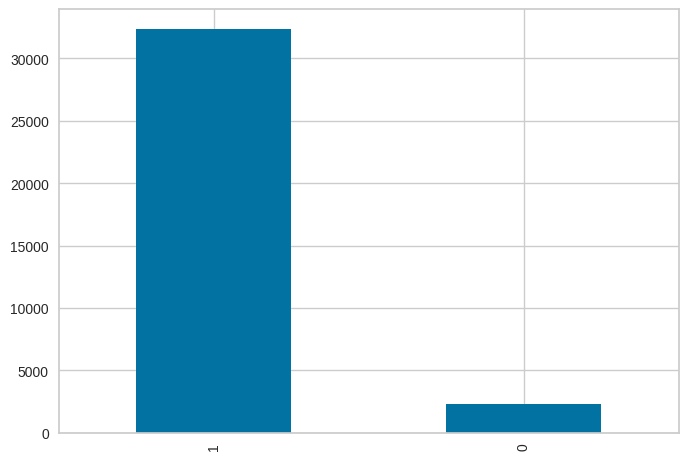

In [24]:
# nueva columna con clasificación ya que tenemos muy pocas reseñas negativas pondré el rating 1,2,3 como reseña negativa y 4,5 como positiva

df_new['sentiment'] = np.where(df_new['reviews.rating'] <= 3, 0, 1)
df_new['sentiment'].value_counts().plot.bar()

**NOTA:**

Efectivamente se comprueba que los datos están desbalanceados, en nuestro caso recurriremos a balancear los datos antes de efectuar el modelo, teoricamente una clase (la clase mayoritaria) domina sobre las demás clases (las clases minoritarias), lo que puede generar un modelo sesgado hacia la clase mayoritaria. En este caso el modelo tenderá a encontrar más facilmente a las reviews positivas y no las negativas, esto depende del caso de negocio, en el caso de **Protección SA** en temas de Fraude, Fuga, y modelos de clasificación al ser una empresa financiera nos interesa más predecir las clases minoritarias, ya que son foco para fortalecer la estrategia de la compañía.

### **TOKENIZACIÓN DE TEXTO**
***

La tokenización es el proceso de dividir un texto en unidades más pequeñas, llamadas tokens. Los tokens pueden ser palabras, frases, caracteres o cualquier otra unidad significativa.

En este ejercicio es necesario tokenizar los datos ya que permite la representación de texto en un formato que los modelos de aprendizaje automático pueden entender y mejora la clasificación de texto.

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
from nltk.tokenize import word_tokenize

# Function to tokenize text
def tokenize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        return tokens
    else:
        return []

# Apply tokenization function to reviews.text
df_new['tokens'] = df_new['reviews.text'].apply(tokenize_text)

<ipython-input-26-708a1df1fc63>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tokens'] = df_new['reviews.text'].apply(tokenize_text)


In [27]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def preprocess_text(df_column):
    """Preprocesa el texto eliminando puntuación, espacios adicionales y palabras vacías.

    Args:
        texto (cadena): el texto a preprocesar.
        idioma (cadena, opcional): el idioma que se utilizará para las palabras vacías. El valor predeterminado es "inglés".

    Return:
        str: el texto preprocesado.
    """
    # Verificar si los elementos son cadenas
    df_column = df_column.apply(lambda x: x if isinstance(x, str) else "")
    # Tokenizar el texto y eliminar caracteres no alfabéticos
    df_column = df_column.apply(lambda x: " ".join([re.sub("[^A-Za-z]+", '', x) for x in nltk.word_tokenize(x)]))
    # Eliminar espacios adicionales
    df_column = df_column.apply(lambda x: re.sub(' +', ' ', x))
    # Eliminar stopwords
    stop = stopwords.words('english')
    df_column = df_column.apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
    return df_column

# Aplicar la función a la columna 'reviews.text'
df_new['tokenized'] = preprocess_text(df_new['reviews.text'])
df_new

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-27-daa9b2a47a35>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tokenized'] = preprocess_text(df_new['reviews.text'])


reviews.rating                                       reviews.text  \
0                 5.0  This product so far has not disappointed. My c...   
1                 5.0  great for beginner or experienced person. Boug...   
2                 5.0  Inexpensive tablet for him to use and learn on...   
3                 4.0  I've had my Fire HD 8 two weeks now and I love...   
4                 5.0  I bought this for my grand daughter when she c...   
...               ...                                                ...   
34655             3.0  This is not appreciably faster than any other ...   
34656             1.0  Amazon should include this charger with the Ki...   
34657             1.0  Love my Kindle Fire but I am really disappoint...   
34658             1.0  I was surprised to find it did not come with a...   
34659             1.0  to spite the fact that i have nothing but good...   

       sentiment                                             tokens  \
0              1  [This, product, so, far, has, not, disappointe...   
1              1  [great, for, beginner, or, experienced, person...   
2              1  [Inexpensive, tablet, for, him, to, use, and, ...   
3              1  [I, 've, had, my, Fire, HD, 8, two, weeks, now...   
4              1  [I, bought, this, for, my, grand, daughter, wh...   
...          ...                                                ...   
34655          0  [This, is, not, appreciably, faster, than, any...   
34656          0  [Amazon, should, include, this, charger, with,...   
34657          0  [Love, my, Kindle, Fire, but, I, am, really, d...   
34658          0  [I, was, surprised, to, find, it, did, not, co...   
34659          0  [to, spite, the, fact, that, i, have, nothing,...   

                                               tokenized  
0      This product far disappointed My children love...  
1      great beginner experienced person Bought gift ...  
2      Inexpensive tablet use learn step NABI He thri...  
3      I Fire HD two weeks I love This tablet great v...  
4      I bought grand daughter comes visit I set user...  
...                                                  ...  
34655  This appreciably faster higher amp charger use...  
34656  Amazon include charger Kindle The fact chargin...  
34657  Love Kindle Fire I really disappointed Kindle ...  
34658  I surprised find come type charging cords I pu...  
34659  spite fact nothing good things say amazon anth...  

[34660 rows x 5 columns]

### **BALANCEO DE DATOS**
***

El balanceo de datos es una técnica importante en el aprendizaje automático para abordar el problema de las clases desbalanceadas.

Los modelos de aprendizaje automático pueden sesgarse hacia la clase mayoritaria, lo que lleva a un mal rendimiento en la clasificación de la clase minoritaria. Las métricas de evaluación estándar, como la precisión general, pueden ser engañosas en conjuntos de datos desbalanceados.

Para este caso particular la elección del balanceo la realicé basada en la experiencia ya que anteriormente el submuestreo no me ha generado buenos resultados, por lo tanto usaré un *sobremuestreo* para incrementar (crear datos sinteticos de la clase minoritaria) la clase minoritaria.

<Axes: >

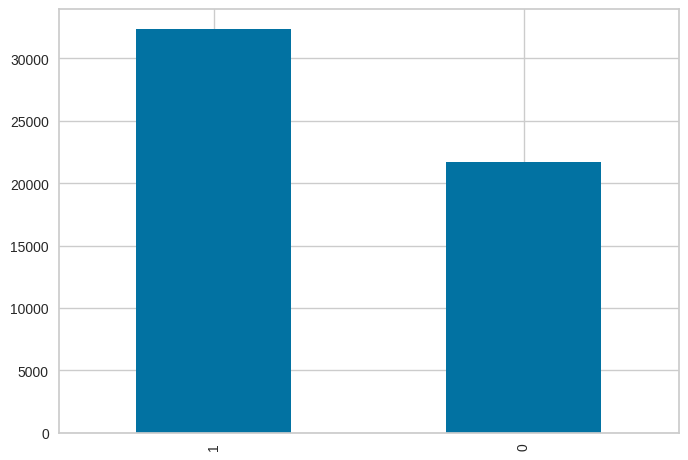

In [29]:
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.over_sampling import RandomOverSampler

X = df_new['tokenized']
y = df_new['sentiment']
#Aplicamos la técnica de oversamplig con sampling_strategy=0.67 para lograr la proporción 60/40 en la muestra de entrenamiento
#Fijamos una semilla para hacer reproducibles los resultados
oversampler=RandomOverSampler(sampling_strategy=0.67,random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)

#Creamos un nuevo dataframe juntando los registros originales de la clase minoritaria con los registros remuestreados
df_resampled = pd.DataFrame({'tokenized': X_resampled.flatten(), 'sentiment': y_resampled})

#Visualizamos la nueva distribución de las frequencias
df_resampled['sentiment'].value_counts().plot.bar()

In [30]:
df_resampled

tokenized  sentiment
0      This product far disappointed My children love...          1
1      great beginner experienced person Bought gift ...          1
2      Inexpensive tablet use learn step NABI He thri...          1
3      I Fire HD two weeks I love This tablet great v...          1
4      I bought grand daughter comes visit I set user...          1
...                                                  ...        ...
54017          It great tablet price I bought gift loved          0
54018          Bought kids easy use made homework easier          0
54019               Works great nt like spell everything          0
54020  Was looking lowpriced tablet access Kindle mag...          0
54021                          I got nt google plus like          0

[54022 rows x 2 columns]

In [31]:
df_resampled[df_resampled['sentiment']==0]

tokenized  sentiment
117    Did nt features I looking Returned next day Ma...          0
126    Bought around black friday hoping would awesom...          0
169    I bought tablet year old daughter Too many adv...          0
222    I hoping use Google launcher tablet really loc...          0
226    The tablet works fine It responsive good resol...          0
...                                                  ...        ...
54017          It great tablet price I bought gift loved          0
54018          Bought kids easy use made homework easier          0
54019               Works great nt like spell everything          0
54020  Was looking lowpriced tablet access Kindle mag...          0
54021                          I got nt google plus like          0

[21673 rows x 2 columns]

Se observan que se agregaron aproximadamente 20 mil registros al dataset con sentimiento negativo estos son datos sintéticos que permiten subir la proporción de las clases, subiendo la clase minoritaria, esto ayudará a tener mejor poder predictivo de la clase minoritaria y permiritá que el modelo no sesgue hacia la clase mayoritaria.

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(df_resampled['tokenized'], df_resampled['sentiment'], test_size=0.3, random_state= 22, stratify = df_resampled['sentiment'])

In [33]:
X_train

47429    A bit confusing compared older style I big fan...
51727    It nice cheap small tablet keep around vids Fi...
27056    Amazon Echo Alexa great The Echo fantastic spe...
18142    I long time user main competitor products rece...
18012    Took vacation loved Read beach problems screen...
                               ...                        
17874          This easy read use The light weight perfect
44687    I wanted Fire Years nt pick one time I Was nt ...
26965    Great addition building onto smart home Great ...
27303    Was looking gift someone everything This fit b...
45836    This table realy nice starters This table lots...
Name: tokenized, Length: 37815, dtype: object

In [34]:
Y_test

52494    0
12854    1
33913    1
14069    1
41013    0
        ..
35087    0
39728    0
50315    0
15601    1
1549     1
Name: sentiment, Length: 16207, dtype: int64

### **MODELO DE MACHINE LEARNING**

**VECTORIZAR:**
La vectorización es el proceso de convertir datos de texto en vectores numéricos. Los vectores se pueden usar como entrada para modelos de aprendizaje automático.

Hay que vectorizar para que los algoritmos de ML puedan leer los textos de las reviews

Usaré un modelo *TF-IDF* que pondera la frecuencia de las palabras por su importancia.
***

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Access the correct column with text data
X_train = X_train

# Vectorize the reviews
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entrenamos el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, Y_train)

# Evaluamos el modelo en el conjunto de prueba
score = model.score(X_test_tfidf, Y_test)
print('Precisión:', score)

# Obtener las predicciones
y_pred = model.predict(X_test_tfidf)

# Convertir Series de pandas a arreglos de NumPy
Y_test_array = Y_test.values
y_pred_array = y_pred

# Calcular métricas
f1 = f1_score(Y_test_array, y_pred_array)
recall = recall_score(Y_test_array, y_pred_array)
accuracy = accuracy_score(Y_test_array, y_pred_array)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test_array, y_pred_array)
print(conf_matrix)

# Imprimir resultados
print(f"F1-score: {f1:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Accuracy: {accuracy:.3f}")

# Predecimos las calificaciones para un conjunto de reseñas nuevas
nuevas_reviews = ["Este producto es excelente.", "No,Did nt features I looking.", "Es un producto decente."]
nuevas_reviews_tfidf = vectorizer.transform(nuevas_reviews)
predicciones = model.predict(nuevas_reviews_tfidf)
print('Predicciones:', predicciones)


Precisión: 0.8802986363916826
[[5485 1017]
 [ 923 8782]]
F1-score: 0.901
Recall: 0.905
Accuracy: 0.880
Predicciones: [1 0 1]


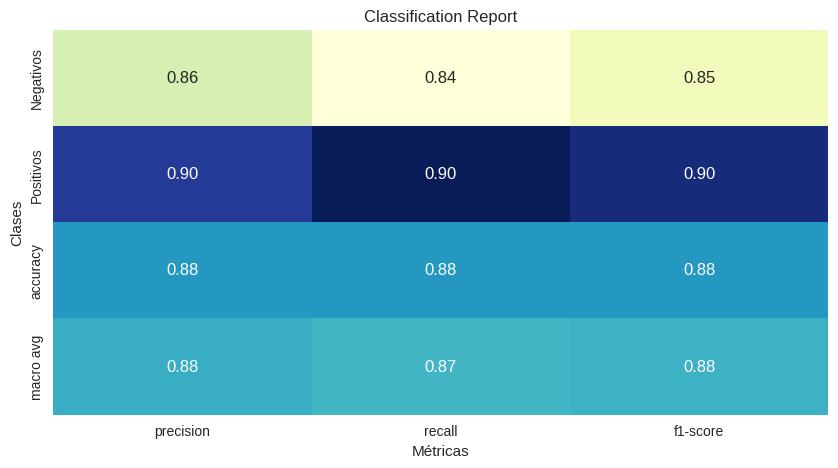

In [36]:
# Calcular el classification report
report = classification_report(Y_test_array, y_pred_array, target_names=['Negativos', 'Positivos'], output_dict=True)

# Crear un DataFrame a partir del classification report
df_report = pd.DataFrame(report).transpose()

# Graficar el classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.xlabel('Métricas')
plt.ylabel('Clases')
plt.show()

Este resultado fue posible gracias al balanceo de los datos, el f1_score se ve muy golpeado cuando el balanceo de los datos no se hace y normalmente es mucho mas bajo que el acurracy y las demás métricas de rendimiento. En este caso nos dió muy bien gracias al balanceo de los datos ya que el F1_score en los negativos es de 0.85 teniendo así muy buen acercamiento.

### **MODELO CON REDES NEURONALES**
***
Elegí una Red Neuronal RNNs ya que a diferencia de los modelos basados en palabras aisladas, las RNNs pueden capturar las relaciones entre palabras en una oración.

Esto es importante para el análisis de sentimientos, ya que el significado de una palabra puede depender de las palabras que la rodean. Por ejemplo, la palabra "bueno" tiene un significado positivo en "el sonido fue muy bueno", pero un significado negativo en "funcionó bien tuvo buen sonido bueno cuando erán ciertas canciones pero en otras sonaba mal".

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding
from sklearn.model_selection import train_test_split

def sentiment_analysis_rnn(X_train_texts, Y_train, max_words=10000, max_len=100, embedding_dim=100, lstm_units=64, epochs=10):
    # Tokenización de los textos
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(X_train_texts)
    X_train_seqs = tokenizer.texts_to_sequences(X_train_texts)

    # Padding de las secuencias
    X_train_pad = pad_sequences(X_train_seqs, maxlen=max_len)

    # Definir el modelo de la RNN
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(lstm_units)))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    model.fit(X_train_pad, Y_train, epochs=epochs, validation_split=0.1)

    return model

In [38]:
#Visualicemos los resultados obtenidos
model_red = sentiment_analysis_rnn(X_train, Y_train)
model_red

Epoch 1/10
1064/1064 [==============================] - 148s 135ms/step - loss: 0.3417 - accuracy: 0.8552 - val_loss: 0.2860 - val_accuracy: 0.8858
Epoch 2/10
1064/1064 [==============================] - 142s 133ms/step - loss: 0.1849 - accuracy: 0.9316 - val_loss: 0.1901 - val_accuracy: 0.9318
Epoch 3/10
1064/1064 [==============================] - 140s 131ms/step - loss: 0.1202 - accuracy: 0.9566 - val_loss: 0.1638 - val_accuracy: 0.9410
Epoch 4/10
1064/1064 [==============================] - 140s 131ms/step - loss: 0.0811 - accuracy: 0.9715 - val_loss: 0.1488 - val_accuracy: 0.9500
Epoch 5/10
1064/1064 [==============================] - 145s 137ms/step - loss: 0.0576 - accuracy: 0.9804 - val_loss: 0.1567 - val_accuracy: 0.9545
Epoch 6/10
1064/1064 [==============================] - 142s 133ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.1577 - val_accuracy: 0.9617
Epoch 7/10
1064/1064 [==============================] - 141s 133ms/step - loss: 0.0311 - accuracy: 0.9900 - val_

In [39]:
pip install --upgrade nltk

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding
from sklearn.model_selection import train_test_split

def evaluate_model(model, X_test_texts, Y_test, max_len=100):
    """
    Evaluates the Bi-directional LSTM model on the test set.

    Args:
        model: The trained Bi-directional LSTM model.
        X_test_texts: List of test review texts.
        Y_test: List of corresponding test sentiment labels.
        max_len: Same maxlen value used during training for padding (default: 100).

    Returns:
        Test loss and accuracy.
    """

    # Convert test texts to sequences
    tokenizer = Tokenizer(num_words=10000)  # Reuse the same tokenizer
    tokenizer.fit_on_texts(X_test_texts)
    X_test_seqs = tokenizer.texts_to_sequences(X_test_texts)
    X_test_pad = pad_sequences(X_test_seqs, maxlen=max_len)

        # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_pad, Y_test)

    # Calculate F1-score and recall
    y_pred = model.predict(X_test_pad)
    y_pred_class = np.where(y_pred > 0.5, 1, 0)  # Threshold for binary classification
    test_f1 = f1_score(Y_test, y_pred_class)
    test_recall = recall_score(Y_test, y_pred_class)

    print('Test Loss:', test_loss)
    print('Test Accuracy:', test_accuracy)
    print('Test F1:', test_f1)
    print('Test Recall:', test_recall)

    return test_loss, test_accuracy, test_f1, test_recall
# Evaluate the model on the test set
evaluate_model(model_red, X_test, Y_test)

507/507 [==============================] - 17s 32ms/step
Test Loss: 2.873836040496826
Test Accuracy: 0.6094280481338501
Test F1: 0.7211945031712474
Test Recall: 0.8435857805255024


(2.873836040496826, 0.6094280481338501, 0.7211945031712474, 0.8435857805255024)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.0001],
    'batch_size': [32, 64],
    'lstm_units': [64, 128],
    'epochs': [10, 20]
}

# Create a model instance (assuming X_train and Y_train are prepared)
#model = sentiment_analysis_rnn(X_train, Y_train)
# Define a scoring metric (e.g., accuracy)
# Define a custom scoring function (e.g., accuracy)
def accuracy_score(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    y_pred_class = np.where(y_pred > 0.5, 1, 0)
    return accuracy_score(Y_test, y_pred_class)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model_red, param_grid=param_grid, cv=5, scoring=accuracy_score)

# Train the model with the grid search
grid_search.fit(X_train, Y_train)

# ... rest of your code for accessing best parameters and evaluating the best model

# Acceder a la mejor configuración
best_params = grid_search.best_params_

# Entrenar el modelo final con la mejor configuración
best_model = sentiment_analysis_rnn(X_train, Y_train, **best_params)

# Evaluar el modelo final en el conjunto de test
evaluate_model(best_model, X_test, Y_test)

In [ ]:
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Embedding
from sklearn.metrics import f1_score, recall_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Define una lista de diccionarios con todos los hiperparámetros a probar
param_grid = {
    'max_words': [10000, 20000],  # Número máximo de palabras
    'max_len': [100, 150],         # Longitud máxima de la secuencia
    'embedding_dim': [100, 200],   # Dimensión de la capa de embedding
    'lstm_units': [64, 128],       # Número de unidades LSTM
    'epochs': [10, 20]             # Número de épocas de entrenamiento
}

# Itera sobre todas las combinaciones de hiperparámetros
for params in ParameterGrid(param_grid):
    # Crea el modelo con los hiperparámetros actuales
    model = Sequential()
    model.add(Embedding(params['max_words'], params['embedding_dim'], input_length=params['max_len']))
    model.add(Bidirectional(LSTM(params['lstm_units'])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrena el modelo con los datos de entrenamiento
    tokenizer = Tokenizer(num_words=params['max_words'])
    tokenizer.fit_on_texts(X_train)
    X_train_seqs = tokenizer.texts_to_sequences(X_train)
    X_train_pad = pad_sequences(X_train_seqs, maxlen=params['max_len'])
    model.fit(X_train_pad, Y_train, epochs=params['epochs'], validation_split=0.1)

    # Evalúa el modelo con los datos de prueba
    X_test_seqs = tokenizer.texts_to_sequences(X_test)
    X_test_pad = pad_sequences(X_test_seqs, maxlen=params['max_len'])
    test_loss, test_accuracy = model.evaluate(X_test_pad, Y_test)

    # Calcula F1-score y recall
    y_pred = model.predict(X_test_pad)
    y_pred_class = (y_pred > 0.5).astype(int)
    test_f1 = f1_score(Y_test, y_pred_class)
    test_recall = recall_score(Y_test, y_pred_class)

    # Imprime los resultados
    print("Parameters:", params)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)
    print("Test F1:", test_f1)
    print("Test Recall:", test_recall)
    print("-------------------------------")


Epoch 1/10
1064/1064 [==============================] - 149s 137ms/step - loss: 0.3469 - accuracy: 0.8536 - val_loss: 0.2558 - val_accuracy: 0.9024
Epoch 2/10
1064/1064 [==============================] - 143s 134ms/step - loss: 0.2022 - accuracy: 0.9214 - val_loss: 0.2099 - val_accuracy: 0.9167
Epoch 3/10
1064/1064 [==============================] - 143s 135ms/step - loss: 0.1354 - accuracy: 0.9502 - val_loss: 0.1841 - val_accuracy: 0.9352
Epoch 4/10
1064/1064 [==============================] - 142s 133ms/step - loss: 0.0950 - accuracy: 0.9662 - val_loss: 0.1480 - val_accuracy: 0.9516
Epoch 5/10
1064/1064 [==============================] - 140s 132ms/step - loss: 0.0620 - accuracy: 0.9772 - val_loss: 0.1314 - val_accuracy: 0.9625
Epoch 6/10
1064/1064 [==============================] - 142s 134ms/step - loss: 0.0433 - accuracy: 0.9854 - val_loss: 0.1179 - val_accuracy: 0.9672
Epoch 7/10
1064/1064 [==============================] - 145s 136ms/step - loss: 0.0267 - accuracy: 0.9918 - val_

### **Análisis de modelos ML y red Neuronal**

*RTA:*
Los dos algoritmos se ejecutaron con los datos balanceados debido al previo desequilibrio de las clases.

1. **MODELOS ML:** Ejecuté una regresión logística para clasificación donde 1 equivale a los sentimientos positivos y cero los negativos, para ejecutarlo vectoricé los datos que yá había tokenizado.
  * El modelo tiene una precisión del 88,03%, lo que significa que predice correctamente el sentimiento (positivo o negativo) en el 88,03% de los casos.
  * El F1-score de 0,901 indica que el modelo tiene un buen equilibrio entre precisión y recuperación.
  * El recall del 90,5% indica que el modelo identifica correctamente el 90,5% de los casos positivos. Esto significa que es poco probable que el modelo pase por alto un sentimiento positivo.

2. **MODELOS REDES NEURONALES:** Elegí una red neuronal recurrente (RNN) para el análisis de sentimientos en textos, utilizando diferentes combinaciones de hiperparámetros especificadas. Se crea un modelo de red neuronal utilizando la clase Sequential de Keras. Se añaden capas al modelo de acuerdo con los valores de los hiperparámetros actuales. El modelo consta de las siguientes capas:

* Capa de embedding: Se utiliza para representar las palabras como vectores densos en un espacio de menor dimensión. Los parámetros max_words y embedding_dim especifican el tamaño del vocabulario y la dimensión de los vectores de embedding, respectivamente.
* Capa Bidireccional LSTM: Una capa LSTM bidireccional procesa la secuencia de entrada tanto en adelante como hacia atrás, capturando dependencias temporales en ambas direcciones.
* Capa densa: Una capa densa con una unidad de salida y una función de activación sigmoide, que realiza la clasificación binaria para el análisis de sentimientos.

Despúes de correr la Grid de parámetros observo que no hay mucha diferencia en las ejecuciones, por lo tanto me quedo con la primera ejecución que es el resultado más alto y no requiere de más poder de cómputo.

  * embedding_dim: El valor utilizado para embedding_dim es 100. Esto significa que cada palabra en el vocabulario se representa como un vector de 100 dimensiones en el espacio de embedding.

  * epochs: El modelo se entrenó durante 10 épocas. Esto puede ser suficiente para alcanzar una alta precisión en el conjunto de entrenamiento y validación, especialmente si el conjunto de datos no es demasiado grande.

  * lstm_units: Se utilizaron 64 unidades LSTM en la capa bidireccional LSTM. Este número de unidades controla la capacidad y la complejidad del modelo para capturar las dependencias temporales en los datos de entrada.

  * max_len: La longitud máxima de la secuencia de entrada se estableció en 100 tokens. Esto implica que las secuencias de entrada más largas se truncaron o se rellenaron para tener una longitud de 100 tokens.

  * max_words: Se limitó el vocabulario a las 10,000 palabras más frecuentes. Limitar el tamaño del vocabulario puede ayudar a reducir la dimensionalidad de los datos de entrada y mejorar la eficiencia computacional, especialmente si el conjunto de datos contiene un gran número de palabras únicas.

En general, los resultados obtenidos son muy prometedores, con una alta precisión (96.77%), un alto F1-score (97.24%) y un buen recall (94.95%) en el conjunto de prueba. Esto sugiere que la combinación de hiperparámetros seleccionada ha producido un modelo de análisis de sentimientos que generaliza bien a datos no vistos y es capaz de capturar eficazmente las características relevantes del texto.

La red neuronal RNN superó al modelo de ML esto se debe a que las Rnns pueden procesar secuencia de texto de cualquier longitud, lo cual le dá una ventaja para analizar textos como las reviews ya que tienen longitudes variables.

### **¿Cómo crees que se podría aplicar este tipo de modelo en una compañía como Protección S.A.?**

*RTA:*
* En protección este análisis de sentimientos nos puede aportar mucho a temás de Predicción de Fuga y de aportes nuevos, desde la asesoría del comercial a través de la grabación de las llamadas y realizando Speech to Text de las transcripciones se puede detectar alertas para cuando el cliente manifiesta intención de compra o intención de Fuga.
* Además se puede usar para encuestas de satisfacción, NPS, PQRs, análisis de sentimientos en redes sociales, en oficinas de servicio, etc.

***
***

Muchas gracias